In [22]:
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import numpy as np
import functools as ft
from datetime import datetime

todayDate = datetime.today().strftime('%Y_%m_%d')
pd.set_option('display.max_columns', 40)

###################################
# https://cbsodata.readthedocs.io/en/latest/readme_link.html

# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cpb.nl/sites/default/files/publicaties/download/cpb-technical-background-document-bvar-models-used-cpb.pdf
###################################

In [23]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

macro_data_cbs, you lose 1995 because of seasonal adjustment


C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\3941335480.py:24: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start = start_date,  periods = data.shape[0], freq = "Q").to_period('Q')
C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\3941335480.py:33: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gdp_total.index = pd.date_range(start=start_date,  periods = gdp_total.shape[0], freq="Q").to_period('Q')
C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\3941335480.py:55: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df.plot(subplots=True, ax=axes, sharex=True)


9


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

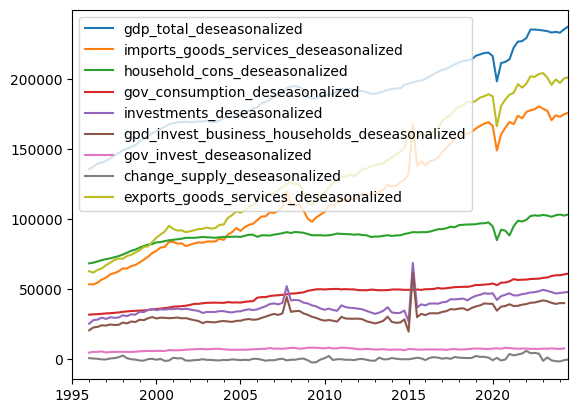

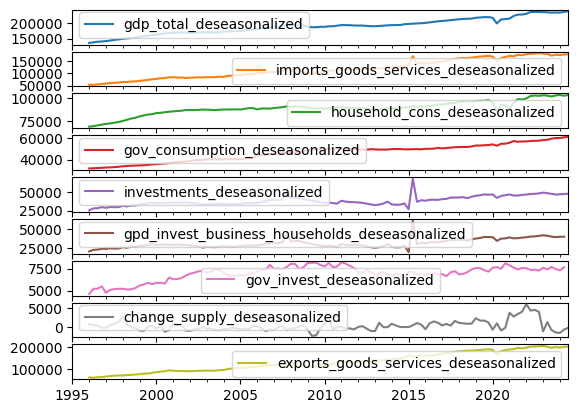

In [24]:
#### GDP
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84105NED/table?ts=1706684088769
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84087NED/table?ts=1696490590802

def macro_data_cbs(identifier, verbose = False):
    print("macro_data_cbs, you lose 1995 because of seasonal adjustment")
    start_date = '01/01/1995'

    if verbose:
        info = cbsodata.get_info(identifier)
        print(info)
        tables = pd.DataFrame(cbsodata.get_table_list())

    # get data
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        data.to_csv(output + "ramdata.csv")
        print(data)
        print(data.Perioden)

    data = data[data["SoortGegevens"] == 'Prijsniveau 2021, seizoengecorrigeerd']
    data = data[data['Perioden'].str.contains('kwartaal')]
    data.index = pd.date_range(start = start_date,  periods = data.shape[0], freq = "Q").to_period('Q')

    gdp_total = data[['BrutoBinnenlandsProduct_2', 'Totaal_3', 'Huishoudens_9', 'Overheid_10', 'Totaal_11', 'BedrijvenEnHuishoudens_12', 'Overheid_13', 'VeranderingInVoorraden_14', 'Totaal_15']]

    gdp_total.columns = ['gdp_total_deseasonalized', 'imports_goods_services_deseasonalized', 'household_cons_deseasonalized', 'gov_consumption_deseasonalized', 'investments_deseasonalized', 'gpd_invest_business_households_deseasonalized', 'gov_invest_deseasonalized', 'change_supply_deseasonalized', 'exports_goods_services_deseasonalized']

    ######################
    # Set data index
    ######################
    gdp_total.index = pd.date_range(start=start_date,  periods = gdp_total.shape[0], freq="Q").to_period('Q')
    # this adds one day, so that we can go to the first of a month
    gdp_total.index = pd.PeriodIndex(gdp_total.index, freq='Q').to_timestamp() #+ datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    return gdp_total

############################
# 85879NED  #Newest data,   https://opendata.cbs.nl/#/CBS/nl/dataset/85879NED/table
# 84105NED  #Classic table, https://opendata.cbs.nl/Statline/#/CBS/nl/dataset/84105NED/table?ts=1723637202741
############################
# You may need to change the above permenantly, base year changed from 2015 to 2021 (in function above)

NLD_basic_macro_data = macro_data_cbs(identifier = '85879NED', verbose = False)
NLD_basic_macro_data.to_csv(output + "cbs_basic_macro_qt.csv")

NLD_basic_macro_data.plot()
plt.title('')
plt.savefig(figures + "NLD_basic_macro_data.png")

df = NLD_basic_macro_data.copy()
print(df.shape[1])
fig, axes = plt.subplots(nrows=df.shape[1], ncols=1)
df.plot(subplots=True, ax=axes, sharex=True)


price_cbs
            ID                     Bestedingscategorieen        Perioden  \
0            0                   000000 Alle bestedingen    1996 januari   
1            1                   000000 Alle bestedingen   1996 februari   
2            2                   000000 Alle bestedingen      1996 maart   
3            3                   000000 Alle bestedingen      1996 april   
4            4                   000000 Alle bestedingen        1996 mei   
...        ...                                       ...             ...   
151839  151839  SA34 Totaal excl. Onderwijs, gezondheid.       2024 juni   
151840  151840  SA34 Totaal excl. Onderwijs, gezondheid.       2024 juli   
151841  151841  SA34 Totaal excl. Onderwijs, gezondheid.   2024 augustus   
151842  151842  SA34 Totaal excl. Onderwijs, gezondheid.  2024 september   
151843  151843  SA34 Totaal excl. Onderwijs, gezondheid.    2024 oktober   

         CPI_1  CPIAfgeleid_2  MaandmutatieCPI_3  MaandmutatieCPIAfgeleid_4  

C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\1106329206.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start='01/01/1996', periods = data.shape[0], freq="M").to_period('M')


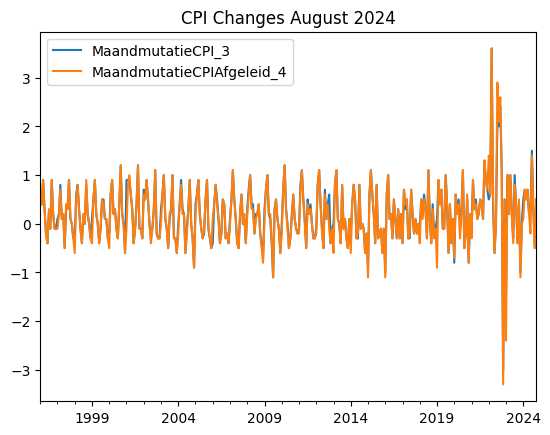

In [25]:

def price_cbs(identifier = '83131NED', verbose = False):
    print("price_cbs")
 
    data = pd.DataFrame(cbsodata.get_data(identifier))

    print(data)
    data = data[data['Bestedingscategorieen'] == '000000 Alle bestedingen']
    data = data[(data['Perioden'].str.len()) > 4]

    if verbose:
        print(data)
        print(data.Perioden)
    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start='01/01/1996', periods = data.shape[0], freq="M").to_period('M')
    cpi1 = data[['CPI_1', 'CPIAfgeleid_2', 'MaandmutatieCPI_3', 'MaandmutatieCPIAfgeleid_4']]

    # this adds one day, so end jan becomes first feb
    cpi1.index = pd.PeriodIndex(cpi1.index, freq='M').to_timestamp() #+ datetime.timedelta(days=1) #pd.offsets.MonthEnd()

    return cpi1

cpi_mo = price_cbs(verbose = False)
cpi_mo.to_csv(output + "cbs_cpi_mo.csv")
cpi_mo[['MaandmutatieCPI_3', 'MaandmutatieCPIAfgeleid_4']].plot()
plt.title('CPI Changes August 2024')
plt.savefig(figures + "cbs_cpi_mo.png")


wage_cbs


C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\1659506512.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start=start_date, periods = data.shape[0], freq="Q").to_period('Q')


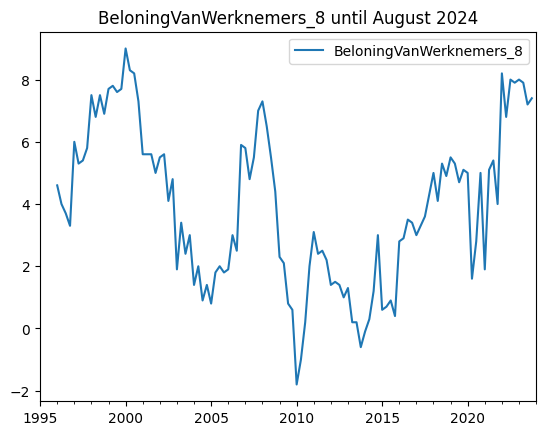

In [26]:

def wage_cbs(identifier = '84163NED', verbose = False):
    print("wage_cbs")
    start_date = '01/01/1995'

    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)
        print(data.Perioden)

    data = data[data['BedrijfstakkenBranchesSBI2008'] == 'A-U Alle economische activiteiten']
    data = data[(data['Perioden'].str.len()) > 4]

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start=start_date, periods = data.shape[0], freq="Q").to_period('Q')

    # this adds one day, so end jan becomes first feb
    data.index = pd.PeriodIndex(data.index,freq='Q').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    data = data[['BeloningSeizoengecorrigeerd_2', 'Loonkosten_7', 'BeloningVanWerknemers_8']]

    return data

wages_qt = wage_cbs(verbose = False)
wages_qt.to_csv(output + "cbs_wages_qt.csv")

wages_qt[['BeloningVanWerknemers_8']].plot()
plt.title('BeloningVanWerknemers_8 until August 2024')
plt.savefig(figures + "cbs_wages_qt.png")

cbs_consumer_conf


C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\958185778.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start='04/01/1986', periods = data.shape[0], freq="M").to_period('M')


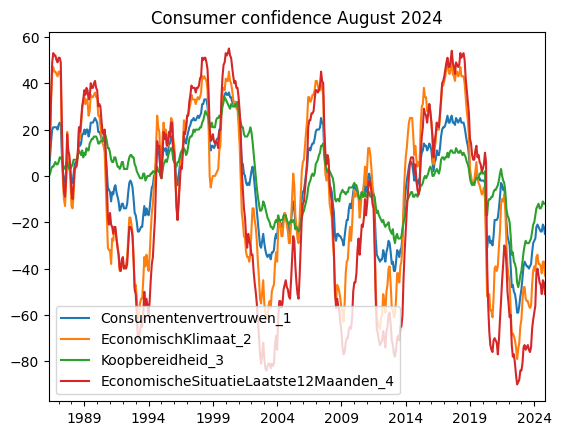

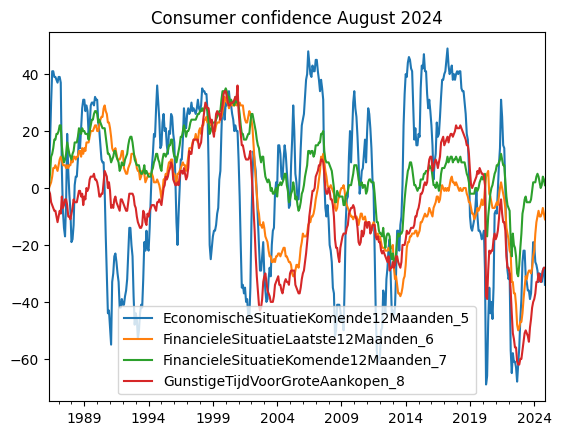

In [27]:

def consumer_confidence_cbs(identifier = '83693NED', verbose = False):
    print("cbs_consumer_conf")
    

    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)
        data.to_csv("consumer_vertrouw.csv")

    data = data[(data['Perioden'].str.len()) > 4]
    data = data[['Consumentenvertrouwen_1', 'EconomischKlimaat_2', 'Koopbereidheid_3', 'EconomischeSituatieLaatste12Maanden_4', 'EconomischeSituatieKomende12Maanden_5', 'FinancieleSituatieLaatste12Maanden_6', 'FinancieleSituatieKomende12Maanden_7', 'GunstigeTijdVoorGroteAankopen_8']]

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start='04/01/1986', periods = data.shape[0], freq="M").to_period('M')

    # this adds one day, so end jan becomes first feb
    data.index = pd.PeriodIndex(data.index, freq='M').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.MonthEnd()

    return data

consumer_confd_mo = consumer_confidence_cbs(verbose = False)
consumer_confd_mo.to_csv(output +"cbs_consumer_confd_mo.csv")

consumer_confd_mo[['Consumentenvertrouwen_1', 'EconomischKlimaat_2', 'Koopbereidheid_3', 'EconomischeSituatieLaatste12Maanden_4']].plot()
plt.title('Consumer confidence August 2024')
plt.savefig(figures + "consumer_confd_1_mo.png")

consumer_confd_mo[['EconomischeSituatieKomende12Maanden_5', 'FinancieleSituatieLaatste12Maanden_6', 'FinancieleSituatieKomende12Maanden_7', 'GunstigeTijdVoorGroteAankopen_8']].plot()
plt.title('Consumer confidence August 2024')
plt.savefig(figures + "consumer_confd_2_mo.png")

bankrupt_cbs


C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\1128268077.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start='01/01/1981', periods=data.shape[0], freq="M").to_period('M')


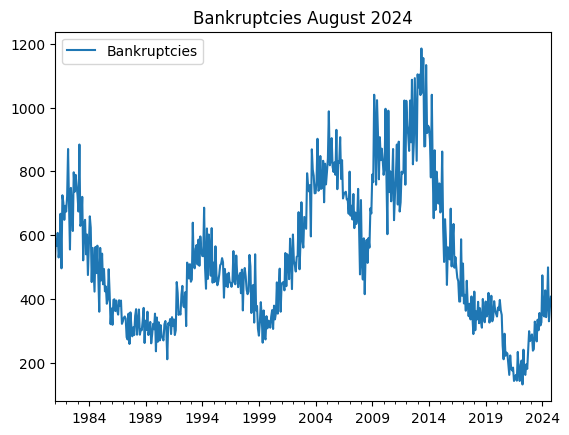

In [28]:

def bankrupt_cbs(identifier = '82242NED', verbose = False):
    print("bankrupt_cbs")
    

    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)

    # remove jaardata
    data = data[(data['Perioden'].str.len()) > 4]
    # remove kwarteldata
    filter = data['Perioden'].str.contains('kwartaal')
    data = data[~filter]

    data = data[data['TypeGefailleerde'] == 'Totaal rechtsvormen Nederland/buitenland']
    data.drop(columns=['ID'], inplace=True)

    data = data[['UitgesprokenFaillissementen_1']]
    data.columns = ['Bankruptcies']

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start='01/01/1981', periods=data.shape[0], freq="M").to_period('M')

    # this adds one day, so end jan becomes first feb
    data.index = pd.PeriodIndex(data.index, freq='M').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.MonthEnd()

    return data

bankrupt_mo = bankrupt_cbs(verbose = False)
bankrupt_mo.to_csv(output + "cbs_bankrupt_mo.csv")

bankrupt_mo.plot()
plt.title('Bankruptcies August 2024')
plt.savefig(figures + "Bankruptcies.png")


producer_confidence
            ProducerConfidence_1  ExpectedActivity_2
1985-01-01                  -2.8                 4.4
1985-02-01                   2.1                 9.8
1985-03-01                   2.4                10.2
1985-04-01                  -1.8                 0.9
1985-05-01                  -1.4                 2.8
...                          ...                 ...
2024-06-01                  -2.4                 9.5
2024-07-01                  -2.7                10.4
2024-08-01                  -1.9                10.7
2024-09-01                  -1.7                11.9
2024-10-01                  -3.2                 6.7

[478 rows x 2 columns]


C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\2795541805.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start='01/01/1985', periods=data.shape[0], freq="M").to_period('M')


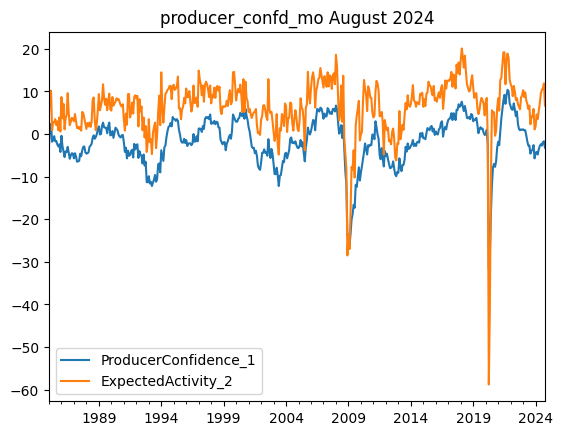

In [ ]:

def producer_confidence( identifier = '81234eng', verbose = False):
    print("producer_confidence")
   
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)

    data = data[data['SectorBranchesSIC2008'] =='C Manufacturing']
    data = data[data['Margins'] == 'Value']
    data = data[['Periods', 'ProducerConfidence_1', 'ExpectedActivity_2']]

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start='01/01/1985', periods=data.shape[0], freq="M").to_period('M')

    # this adds one day, so end jan becomes first feb
    data.index = pd.PeriodIndex(data.index, freq='M').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.MonthEnd()
    data.drop(columns = ['Periods'], inplace = True)

    return data

producer_confd_mo = producer_confidence(verbose = False)
producer_confd_mo.to_csv(output + "cbs_producer_confd_mo.csv")
print(producer_confd_mo)

producer_confd_mo.plot()

plt.savefig(figures + "producer_confd_mo.png")

business utilization


C:\Users\jpark\AppData\Local\Temp\ipykernel_26972\3303096145.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_final.index = pd.date_range(start='01/01/2012', periods=df_final.shape[0], freq="M").to_period('M')


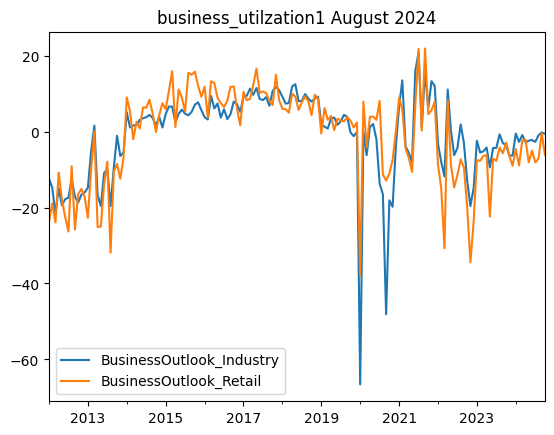

In [30]:
def business_utilzation( identifier = '85612ENG', verbose = False):
    print("business utilization")

    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)

    sectors = ['C Industry, H-S services and 45+47', '47 Retail trade (not in motor vehicles)']

    sectors1 = []
    for i in sectors:
        data1 = data[data['SectorBranchesSBI2008'] == i]
        data1 = data1[data1['Margins'] == 'Value']
        data1 = data1[['Periods', 'SectorBranchesSBI2008', 'BusinessSituationNextThreeMonths_3']]
        data1.set_index('Periods', inplace=True)
        sectors1.append(data1)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'),
                         sectors1)

    ######################
    # Set data index
    ######################
    df_final.index = pd.date_range(start='01/01/2012', periods=df_final.shape[0], freq="M").to_period('M')

    # this adds one day, so end jan becomes first feb
    df_final.index = pd.PeriodIndex(df_final.index,
                                    freq='M').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    df_final = df_final[['BusinessSituationNextThreeMonths_3_x', 'BusinessSituationNextThreeMonths_3_y']]
    df_final.columns = ['BusinessOutlook_Industry', 'BusinessOutlook_Retail']


    return df_final

business_utilzation1 = business_utilzation(verbose = False)
business_utilzation1.to_csv(output + "cbs_business_utilzation_mo.csv")
business_utilzation1.plot()

plt.title('business_utilzation1 August 2024')
plt.savefig(figures + "business_utilzation1_mo.png")
plt.show()